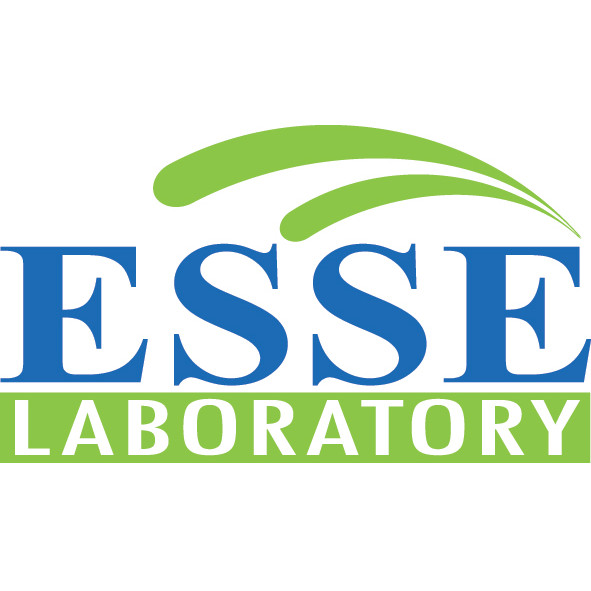
<img align =right src = "https://www.mastere.tn/wp-content/uploads/2020/07/enetcomlogo.png" width ="200"/>
<img align =center src = "https://moodle.devsfax.org/pluginfile.php/55961/coursecat/description/logo.png" width ="250"/>

# Summer internship : Early and automatic detection of keratoconus disease #

## 01 - Overview of keratoconus disease and Data Pre-processing ##
This internship's purpose consists of using new artificial intelligence technologies and concepts for the early detection and automatic detection of the keratoconus disease. The goal is to demonstrate how supervised ML techniques can be used to classify data with high number of features, and can show high accuracy scores, along with aiming to define the best model and deploy it with an interface to allow real-time testing if patient has keratoconus or not and predict the stage of the disease.

**Table of Contents**
<br>
This notebook covers the below sections: 
1. [Keratoconus: Overview](#s1-1)
    * [Signs](#s1-1.1) 
    * [Causes](#s1-1.2)
    * [Diagnosis](#s1-1.3)
    * [OCT images](#s1-1.4)
    * [ORBSCAN](#s1-1.5)
    * ..
2. [Data Pre-processing](#s2-1)
    * [Introducing the data](#s2-1.1)
    * [Cleaning the data](#s2-1.2)
    * [Normalisation of the data](#s2-1.3)
    * ..

***

<a name='s1-1'></a>
## Keratoconus: Overview ##
__Keratoconus__ (ker-uh-toe-KOH-nus) is defined as an idiopathic corneal abnormality occurs when the __cornea__ — the clear, dome-shaped front surface of the eye — thins and gradually bulges outward into a <font color=blue>cone shape</font>. [1](https://www.sciencedirect.com/science/article/abs/pii/S0039625797001197)

A cone-shaped cornea causes blurred vision and may cause sensitivity to light and glare. Keratoconus usually affects both eyes, though it often affects one eye more than the other. It generally begins to affect people between the ages of 10 and 25. The condition may progress slowly for 10 years or longer.

<img align=right src = "https://www.clevelandeyeclinic.com/wp-content/uploads/2016/11/keratoconus_vs_normal.jpg" width="350">
<img align=center src = "https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2019/03/18/22/34/keratoconus-8col-3080463-001-0.jpg" width="500">


***

<a name='s1-1.1'></a> 
### Signs ###
Signs and symptoms of keratoconus may change as the disease progresses. They include:
* Blurred or distorted vision
* Increased sensitivity to bright light and glare, which can cause problems with night driving
* A need for frequent changes in eyeglass prescriptions
* Sudden worsening or clouding of vision



****

<a name='s1-1.2'></a>
### Causes ###
The definitive cause of keratoconus is unknown, although __genetic__ and __environmental factors__ are thought to be involved.
#### Risk factors ####
These factors can increase your chances of developing keratoconus:
* Having a family history of keratoconus
* Rubbing your eyes vigorously
* Having certain conditions, such as retinitis pigmentosa, Down syndrome, Ehlers-Danlos syndrome, hay fever and asthma
***

<a name='s1-1.3'></a>
### Diagnosis ###
To diagnose keratoconus, the eye doctor (ophthalmologist or optometrist) will review the medical and family history of the patient and conduct an eye exam, including other tests to determine more details regarding the shape of the patient's cornea. Tests to diagnose keratoconus include:
* __Eye refraction__: in which the doctor will use special equipment that measures eyes to check for vision problems.
<img src="https://www.verywellhealth.com/thmb/0mv6jXiB6CVtIll6HTsyVxb2bOc=/3867x2175/smart/filters:no_upscale()/GettyImages-180406476-56c5f88d5f9b58e9f33572d1.jpg" align ='center' width="300"/>
* __Slit-lamp examination__: in which the doctor will evaluate the shape of the cornea and looks for other potential problems in the patient's eye, by directing a vertical beam of light on its surface and using a low-powered microscope to view it. 

<img src="https://jia.org.uk/wp-content/uploads/2020/06/Optometrist-and-teenager-featured.jpg" align ='center' width="200">

* __Keratometry__: In this test the eye doctor focuses a circle of light on the cornea and measures the reflection to determine the basic shape of the cornea.

<img src="https://georgegooneratneopticians.com/wp-content/uploads/2019/05/Keratometer.png" align ='center' width="250">

* __Computerized corneal mapping__: Special photographic tests, such as corneal tomography and corneal topography, record images to create a detailed shape map of your cornea. Corneal tomography can also measure the thickness of your cornea. Corneal tomography can often detect early signs of keratoconus before the disease is visible by slit-lamp examination.

<img src="https://images.ctfassets.net/u4vv676b8z52/7dSFrf8D45lr0CDgUB5ZF0/1caa41c858ed9905337fe1445f1fc8e6/corneal-topography-678x446.gif?fm=jpg&q=80" align ='right' width="350">

<img src="https://i.pinimg.com/736x/d8/7e/2a/d87e2a1e469ec1416b9b14b4ce236259--healthy-eyes-old-age.jpg" align ='center' width="500">

<a name='s1-1.4'></a>
### OCT images ###

<a name='s1-1.5'></a>
### ORBSCAN ###
___The Orbscan corneal topography system___ is a device to evaluate corneal topography by measuring the anterior and posterior corneal surface simultaneously. It provides both anterior and posterior corneal elevation maps as well as axial power data/ axial curvature of the cornea : the thickness of the entire cornea. Using a scanning optical slit device.

<img src="https://bjo.bmj.com/content/bjophthalmol/83/7/774/F2.large.jpg" align ='center' width="600">

- Pachymetric patterns in maps generated with the Orbscan corneal topography system: (A) oval; (B) round; (C) decentred round; (D) decentred oval.

<a name='s2-1'></a>
## Data Pre-processing ##

<a name='s2-1.1'></a>
### Introducing the data ###

In [1]:
#import data and take a look
import numpy as np
import pandas as pd
data = pd.read_csv(r"../input/keratoconus-stage-detection/dataset.csv")

The dataset that we'll be using is a CSV file containing information about different patients' eyes in order to detect keratoconus disease

In [2]:
data.head(10)

,Unnamed: 0,idEye,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,En.Anterior.,ESI.Anterior.,ESI.Posterior.
0,9,1OS(Left),44.53,21,39.22,111,41.87,5.32,86.7,0.91,...,3.131,97,-0.722,3.350,1.053,3.512,99,Enable,45,27
1,10,1OD(Right),43.84,39,42.46,129,43.15,1.38,88.2,0.65,...,0.575,97,0.085,0.921,0.290,0.966,100,Enable,0,0
2,39,2OD(Right),44.81,66,44.41,156,44.61,0.40,83.0,0.48,...,0.177,9,0.268,0.263,0.640,0.692,100,Enable,0,0
3,55,4OS(Left),44.00,51,42.31,141,43.15,1.69,97.3,0.60,...,0.492,275,-0.281,3.396,1.419,3.680,100,Enable,0,29
4,56,4OD(Right),45.42,26,45.20,116,45.31,0.22,93.3,0.69,...,0.571,85,0.109,0.691,0.181,0.714,100,Enable,0,7
5,68,5OS(Left),62.98,68,42.51,158,52.74,20.47,95.5,0.25,...,3.791,45,-1.581,13.387,9.154,16.218,98,Enable,95,0
6,69,5OD(Right),44.23,85,42.86,175,43.54,1.37,96.7,0.43,...,0.269,88,0.105,0.398,0.376,0.548,100,Enable,0,0
7,87,6OD(Right),44.61,170,43.75,80,44.18,0.86,97.9,0.46,...,0.085,20,0.375,0.437,0.360,0.566,100,Enable,0,52
8,88,6OS(Left),44.13,174,43.03,84,43.58,1.10,97.2,0.46,...,0.146,229,0.353,0.371,0.485,0.611,100,Enable,0,63
9,138,8OD(Right),45.83,165,45.37,75,45.60,0.46,96.8,0.80,...,0.219,74,0.269,0.330,0.315,0.457,100,Enable,0,24


In [3]:
for col in data.columns:
    if (col.startswith("Result")):
        print(col)

Result
Result.1
Result.2
Result.3
Result.4
Result.5
Result.6


In [4]:
#for col in data.columns:
  #  print(col)
print(data['Result'])
print('****************************************')
print(data['Result.1'])

0       1
1       1
2       0
3       0
4       1
       ..
3157    1
3158    1
3159    0
3160    1
3161    0
Name: Result, Length: 3162, dtype: int64
****************************************
0       1
1       0
2       0
3       0
4       0
       ..
3157    1
3158    0
3159    0
3160    0
3161    0
Name: Result.1, Length: 3162, dtype: int64


***

In order to get a high accuracy score for the models , it is important to have a clean dataset.

First step : we have to deal with messy data, whether that means missing values, inconsistent formatting, malformed records, or nonsensical outliers.

<a name='s2-1.2'></a>
### Cleaning the data ###